# Coding up the SVM

In [1]:
from class_vis import prettyPicture
from prep_terrain_data import makeTerrainData

In [2]:
import matplotlib.pyplot as plt
import copy
import numpy as np
import pylab as pl

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

features_train, labels_train, features_test, labels_test = makeTerrainData()

clf = SVC(kernel="linear", gamma=1.0)
clf.fit(features_train, labels_train)

pred = clf.predict(features_test)
acc = accuracy_score(pred, labels_test)

print acc

0.92


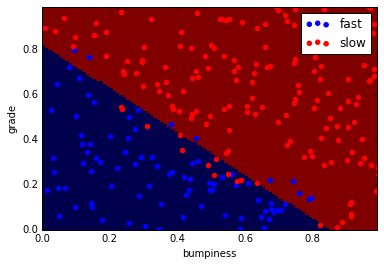

In [3]:
%matplotlib inline
prettyPicture(clf, features_test, labels_test)
plt.show()

# SVM C Parameter

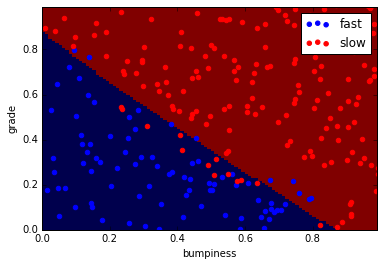

In [4]:
clf2 = SVC(kernel="rbf", C=10.0)
clf2.fit(features_train, labels_train)
prettyPicture(clf2, features_test, labels_test)
plt.show()

# Mini Project

In [5]:
from time import time
from email_preprocess import preprocess

features_train, features_test, labels_train, labels_test = preprocess(words_file='word_data.pkl', \
                                                                        authors_file='email_authors.pkl')

/Users/snewman/Envs/sandbox/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


no. of Chris training emails: 7936
no. of Sara training emails: 7884


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

t0 = time()
clf = SVC(kernel='linear')
clf.fit(features_train, labels_train)
print 'Training time: %ds' % round(time()-t0, 3)

In [ ]:
t1 = time()
pred = clf.predict(features_test)
acc = accuracy_score(pred, labels_test)
print 'Prediction time: %ds' % round(time()-t1, 3)
print acc

Using a smaller training set:

In [6]:
features_train_onepct = features_train[:len(features_train)/100] 
labels_train_onepct = labels_train[:len(labels_train)/100]

In [7]:
t3 = time()
clf = SVC(kernel='linear')
clf.fit(features_train_onepct, labels_train_onepct)
print 'Training time: %ds' % round(time()-t3, 3)

Training time: 0s


In [8]:
t4 = time()
pred = clf.predict(features_test)
acc = accuracy_score(pred, labels_test)
print 'Prediction time: %ds' % round(time()-t4, 3)
print acc

Prediction time: 1s
0.884527872582


Using a rbf kernel:

In [11]:
t = time()
clf = SVC(kernel='rbf')
clf.fit(features_train_onepct, labels_train_onepct)
print 'Training time: %ds' % round(time()-t, 3)

t = time()
pred = clf.predict(features_test)
acc = accuracy_score(pred, labels_test)
print 'Prediction time: %ds' % round(time()-t, 3)
print acc

Training time: 0s
Prediction time: 1s
0.616040955631


In [19]:
t = time()
clf = SVC(kernel='rbf', C=10000.0)
clf.fit(features_train_onepct, labels_train_onepct)
print 'Training time: %ds' % round(time()-t, 3)

t = time()
pred = clf.predict(features_test)
acc = accuracy_score(pred, labels_test)
print 'Prediction time: %ds' % round(time()-t, 3)
print acc

Training time: 0s
Prediction time: 1s
0.892491467577


In [25]:
print 'Chris' if pred[10] == 1 else 'Sara'
print 'Chris' if pred[26] == 1 else 'Sara'
print 'Chris' if pred[50] == 1 else 'Sara'

Chris
Sara
Chris


# How Many Chris Emails Predicted

_Note: This was only run on the 1% data:_

In [28]:
print sum(pred)

1018
